<a href="https://colab.research.google.com/github/rgrion/mslsistemasadaptativos/blob/main/sistemas_adaptativos_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("estudos_adaptativos.csv")

df

,estudo,tec_fuzzy,tec_bayesiana,tec_ml_pred_class,tec_ml_interpretavel,tec_modelagem_conhecimento,tec_ecd_progressao,tec_practice_scheduling,tec_sensores_ubiquos,tec_llm,...,ben_personalizacao,ben_lacunas,ben_eficiencia,ben_apoio_docente,ben_inclusao,des_dados_qualidade,des_escalabilidade_custo,des_alinhamento_pedagogico,des_privacidade,des_infra_organizacao
[Ghergulescu et al. 2021],0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
[Singh et al. 2022],0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
[AL-Chalabi et al. 2021],1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
[Szczepanski and Marciniak 2023],1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
[Prihar et al. 2022],0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
[Mandal and Naskar 2021],0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
[Liu et al. 2021],0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
[Eryilmaz and Adabashi 2020],1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
[Ezzaim et al. 2024],0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
[Chen et al. 2024],0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [3]:
cols_tec = [c for c in df.columns if c.startswith("tec_")]
cols_ben = [c for c in df.columns if c.startswith("ben_")]
cols_des = [c for c in df.columns if c.startswith("des_")]

freq_tec = df[cols_tec].sum().sort_values(ascending=False)
freq_ben = df[cols_ben].sum().sort_values(ascending=False)
freq_des = df[cols_des].sum().sort_values(ascending=False)

print("Frequência de técnicas (número de estudos):")
print(freq_tec)

print("\nFrequência de benefícios:")
print(freq_ben)

print("\nFrequência de desafios:")
print(freq_des)

Frequência de técnicas (número de estudos):
tec_bayesiana                 6
tec_analise_institucional     6
tec_ml_interpretavel          3
tec_sensores_ubiquos          3
tec_chatbot                   3
tec_fuzzy                     2
tec_ml_pred_class             1
tec_modelagem_conhecimento    1
tec_ecd_progressao            1
tec_llm                       1
tec_practice_scheduling       1
tec_eye_tracking              1
tec_agrupamento               1
dtype: int64

Frequência de benefícios:
ben_engajamento       7
ben_desempenho        4
ben_personalizacao    3
ben_lacunas           3
ben_eficiencia        3
ben_apoio_docente     3
ben_inclusao          3
dtype: int64

Frequência de desafios:
des_dados_qualidade           7
des_escalabilidade_custo      7
des_alinhamento_pedagogico    6
des_infra_organizacao         6
des_privacidade               4
dtype: int64


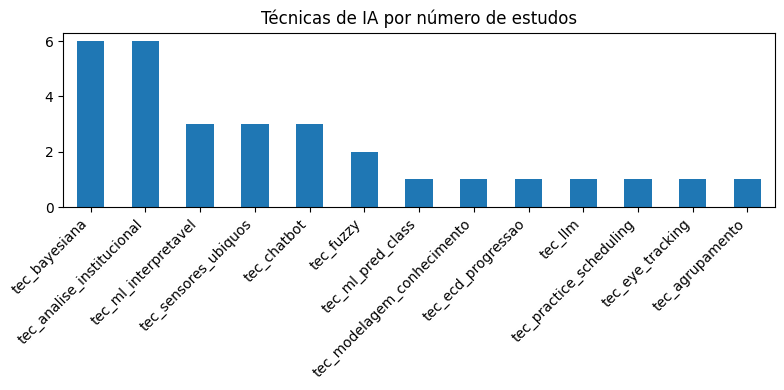

In [4]:
plt.figure(figsize=(8,4))
freq_tec.plot(kind="bar")
plt.title("Técnicas de IA por número de estudos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combina benefícios e desafios em um único eixo
cols_ben_des = cols_ben + cols_des

# Matriz de coocorrência unificada
cooc_full = df[cols_tec].T.dot(df[cols_ben_des])

cooc_full

,ben_desempenho,ben_engajamento,ben_personalizacao,ben_lacunas,ben_eficiencia,ben_apoio_docente,ben_inclusao,des_dados_qualidade,des_escalabilidade_custo,des_alinhamento_pedagogico,des_privacidade,des_infra_organizacao
tec_fuzzy,0,2,1,0,0,0,1,2,0,1,0,1
tec_bayesiana,0,1,0,1,1,1,0,4,3,1,0,2
tec_ml_pred_class,0,0,0,1,0,0,0,1,0,1,0,0
tec_ml_interpretavel,1,1,2,2,1,0,1,1,0,3,0,1
tec_modelagem_conhecimento,0,0,0,0,0,0,0,0,0,0,0,0
tec_ecd_progressao,0,0,0,0,1,0,0,0,1,0,0,1
tec_practice_scheduling,0,1,0,0,0,0,0,0,0,0,1,0
tec_sensores_ubiquos,1,1,0,0,0,1,0,0,2,0,2,0
tec_llm,1,1,0,0,0,0,0,0,1,0,1,0
tec_eye_tracking,1,1,0,0,0,0,0,0,0,1,0,1


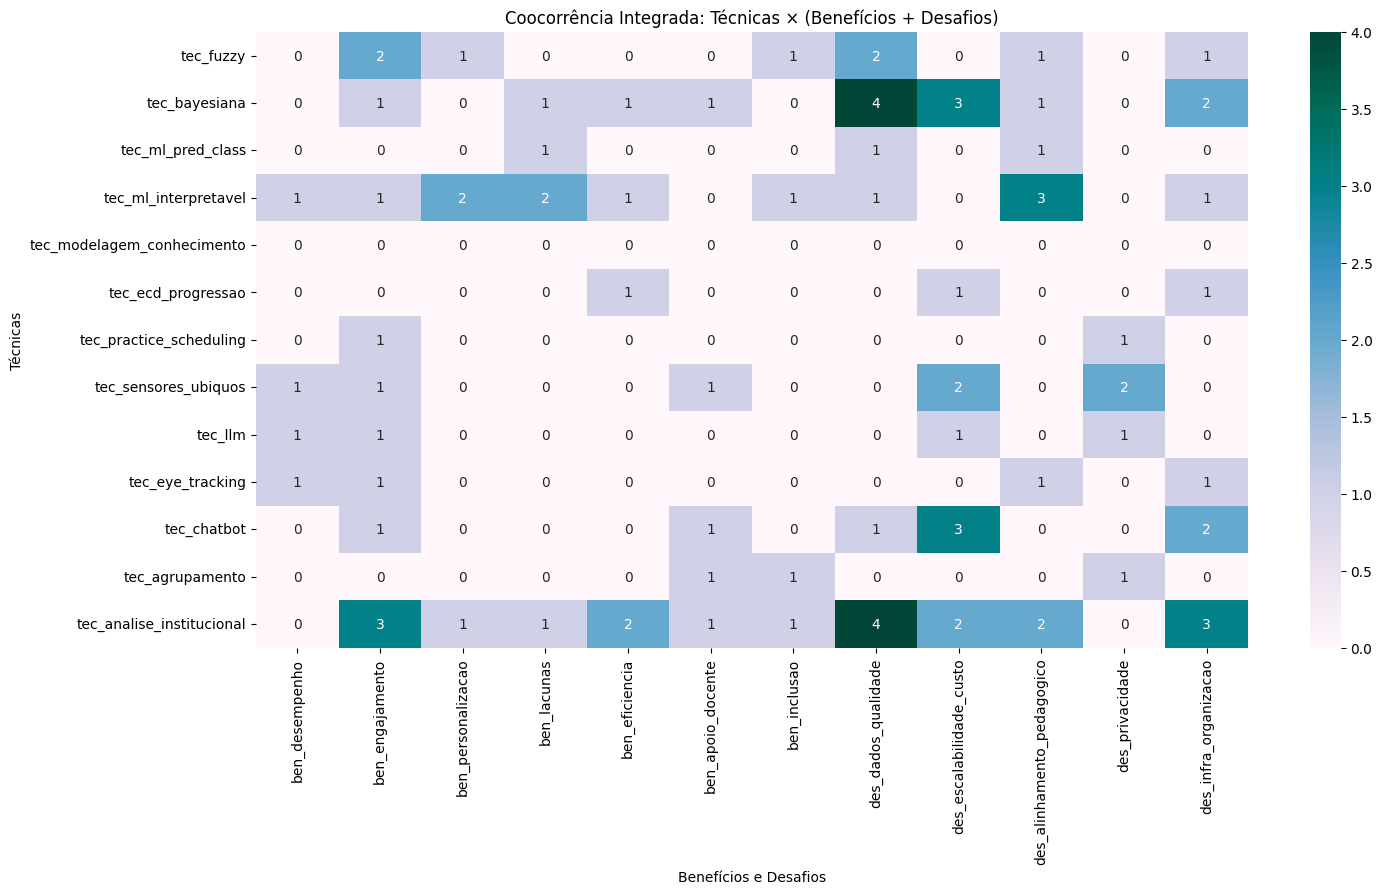

In [6]:
plt.figure(figsize=(16,8))
sns.heatmap(cooc_full, annot=True, cmap="PuBuGn")
plt.title("Coocorrência Integrada: Técnicas × (Benefícios + Desafios)")
plt.xlabel("Benefícios e Desafios")
plt.ylabel("Técnicas")
plt.show()
